In [1]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

In [2]:
data=pd.read_csv('Rakshabandhan1.csv',encoding= "ISO-8859-1")

In [3]:
data.head()

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
0,RT @akshaykumar: My go to person when Im in a...,False,0,NaN,2021-08-23 03:22:44,False,NaN,1429645254823530502,NaN,"<a href=""http://twitter.com/download/android"" ...",SanjeevNohara,1447,True,False,NaN,NaN
1,RT @SadhguruJV: #RakshaBandhan is a promise to...,False,0,NaN,2021-08-23 03:22:44,False,NaN,1429645251786862596,NaN,"<a href=""http://twitter.com/download/android"" ...",ShyamjiIndian,1657,True,False,NaN,NaN
2,RT @Workingboxwali: Man protecting woman on #R...,False,0,NaN,2021-08-23 03:22:44,False,NaN,1429645250994208773,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",realprashanth95,946,True,False,NaN,NaN
3,RT @Vandnadassi: #LifeSavior_GodKabir\r\n#Happ...,False,0,NaN,2021-08-23 03:22:43,False,NaN,1429645249610059783,NaN,"<a href=""http://twitter.com/download/android"" ...",RoshnideviA,247,True,False,NaN,NaN
4,RT @ChinarcorpsIA: On the occasion of #Rakshab...,False,0,NaN,2021-08-23 03:22:40,False,NaN,1429645236964261897,NaN,"<a href=""http://twitter.com/download/android"" ...",Manzoor80440560,106,True,False,NaN,NaN


In [4]:
data=pd.DataFrame(data.text)

In [5]:
data.head()

,text
0,RT @akshaykumar: My go to person when Im in a...
1,RT @SadhguruJV: #RakshaBandhan is a promise to...
2,RT @Workingboxwali: Man protecting woman on #R...
3,RT @Vandnadassi: #LifeSavior_GodKabir\r\n#Happ...
4,RT @ChinarcorpsIA: On the occasion of #Rakshab...


In [6]:
data.iloc[0,0]

'RT @akshaykumar: My go to person when I\x92m in a dilemma, someone who\x92s  always stood by my side, corrected me when I\x92m wrong, happiest for m\x85'

In [7]:
data.iloc[2,0]

'RT @Workingboxwali: Man protecting woman on #Rakshabandhan is patriarchy. Woman protecting man on #Karwachauth is also patriarchy. Only wha\x85'

## Converting data into LOwer Case

In [8]:
data.text=data.text.str.lower()

In [9]:
data.iloc[2,0]

'rt @workingboxwali: man protecting woman on #rakshabandhan is patriarchy. woman protecting man on #karwachauth is also patriarchy. only wha\x85'

## Removing the URL from Data

In [10]:
data.text=data.text.str.replace(r'http\S+|www.\S+','',case=False)

In [11]:
data.iloc[2,0]

'rt @workingboxwali: man protecting woman on #rakshabandhan is patriarchy. woman protecting man on #karwachauth is also patriarchy. only wha\x85'

## Removing the Punctuation

In [12]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
def remove_punctuation(text):
    text_nopunt="".join([c for c in text if c not in string.punctuation])
    return text_nopunt

In [14]:
data.text=data.text.apply(lambda x : remove_punctuation(x))

In [15]:
data.iloc[2,0]

'rt workingboxwali man protecting woman on rakshabandhan is patriarchy woman protecting man on karwachauth is also patriarchy only wha\x85'

## Removing the Number 

In [16]:
data.text=data.text.str.replace('/d','')

In [17]:
data.iloc[2,0]

'rt workingboxwali man protecting woman on rakshabandhan is patriarchy woman protecting man on karwachauth is also patriarchy only wha\x85'

## Removing the Stop Word

In [18]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ANKIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [20]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
data.text=data.text.apply(lambda x :' '.join([word for word in x.split()if word not in (stop)]))

In [22]:
data.iloc[47,0]

'rt sadhgurujv rakshabandhan promise protect feminine fragility value fragrance \x96sg'

In [23]:
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet')
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ANKIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w,'v') for w in w_tokenizer.tokenize(text)]

In [25]:
data.text=data.text.apply(lambda x :' '.join(lemmatize_text(x)))

In [26]:
data.iloc[2,0]

'rt workingboxwali man protect woman rakshabandhan patriarchy woman protect man karwachauth also patriarchy wha'

## Lemmatization

In [27]:
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet')
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ANKIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
def lemmatize_text(text):
    return[lemmatizer.lemmatize(w,'v')for w in w_tokenizer.tokenize(text)]

In [29]:
data.text = data.text.apply(lambda x :' '.join(lemmatize_text(x)))

In [30]:
data.iloc[2,0]

'rt workingboxwali man protect woman rakshabandhan patriarchy woman protect man karwachauth also patriarchy wha'

## Strip Extra Whitespace

In [31]:
data.text=data.text.astype('str').str.rstrip()

In [32]:
data.iloc[2,0]

'rt workingboxwali man protect woman rakshabandhan patriarchy woman protect man karwachauth also patriarchy wha'

## Organizing the Data

# Document term Matrix

In [33]:
data.head()

,text
0,rt akshaykumar go person im dilemma someone w...
1,rt sadhgurujv rakshabandhan promise protect fe...
2,rt workingboxwali man protect woman rakshaband...
3,rt vandnadassi lifesaviorgodkabir happyrakshab...
4,rt chinarcorpsia occasion rakshabandhan local ...


In [34]:
# We are going to create a document-term matrix using CountVectorizer,
# and exclude common English stop words

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
cv = CountVectorizer(stop_words='english') #dtm
data_cv = cv.fit_transform(data.text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())

In [37]:
tdm=data_dtm.transpose()
tdm

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
1905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22jasminbhasin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
430,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aarey,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
actorvijay,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
years,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yehhainayidilli,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
young,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
youu0001f917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
tdm['freq']=tdm.sum(axis=1)

In [39]:
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,freq
1905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
22jasminbhasin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
430,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
aarey,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
actorvijay,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,141,142,143,144,145,146,147,148,149,freq
0,1905,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,22jasminbhasin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,430,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,aarey,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,actorvijay,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
tdm1=tdm[["index","freq"]]
tdm1.rename(columns = {'index':'Word'}, inplace =True)
tdm1.sort_values(by='freq',ascending=False,inplace=True)

C:\Users\ANKIT\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-41-147d925c6a26>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdm1.sort_values(by='freq',ascending=False,inplace=True)


In [42]:
tdm1.head()

,Word,freq
372,rt,141
355,rakshabandhan,120
66,celebrate,42
488,u2764ufe0f,28
257,love,27


In [43]:
w = tdm1[tdm1['freq'] >25]
w

,Word,freq
372,rt,141
355,rakshabandhan,120
66,celebrate,42
488,u2764ufe0f,28
257,love,27
496,urstrulymahesh,26
336,protect,26


C:\Users\ANKIT\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ANKIT\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


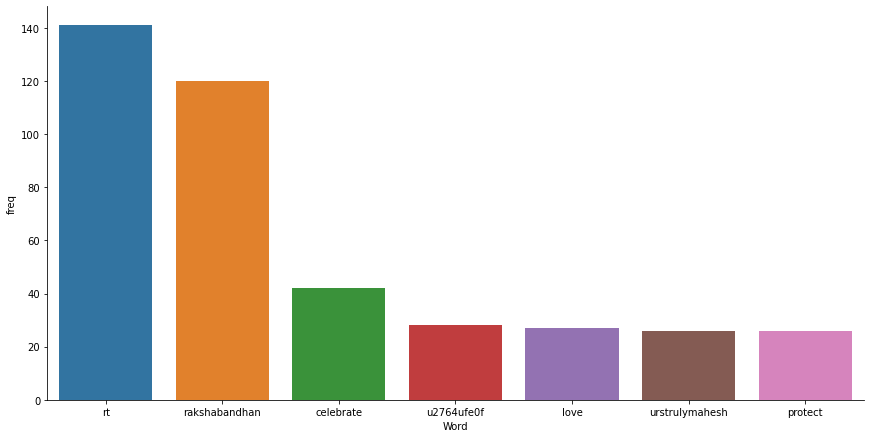

In [73]:
import seaborn as sns
fg = sns.factorplot(x='Word', y='freq',
                        size=6,  aspect=2,
                        kind='bar', 
                        data=w)

In [81]:
text = " ".join(review for review in data.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 8188 words in the combination of all review.


In [82]:
from wordcloud import WordCloud , STOPWORDS,ImageColorGenerator

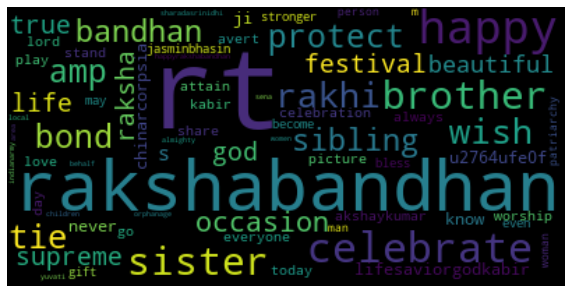

In [83]:
stopwords=set(STOPWORDS)
# Generating a word cloud image
wordcloud=WordCloud(stopwords=stopwords,
                    background_color='Black',
                    collocations=False,
                     max_words=70).generate(text)
# Displaying the generated image:
# the matplotlib way:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

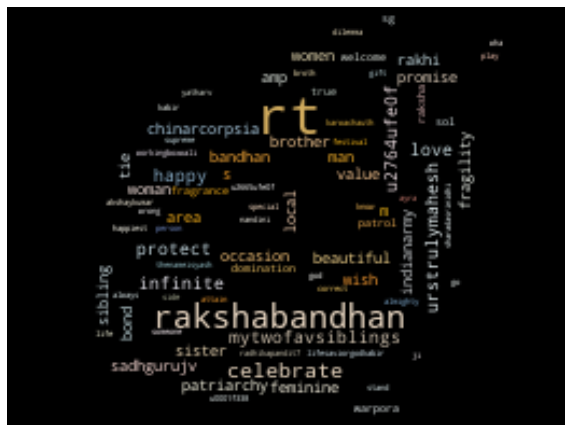

In [48]:
# Generate a word cloud image
from PIL import Image

mask = np.array(Image.open("images.jpg"))
wordcloud_full = WordCloud(stopwords=stopwords,background_color='Black',
                           mode="RGBA",
                           max_words=13000,
                           mask=mask,
                           collocations=False).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,15])  # facecolor='k' to give round box
plt.imshow(wordcloud_full.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

# Sentimental Analysis

In [49]:
data.head()

,text
0,rt akshaykumar go person im dilemma someone w...
1,rt sadhgurujv rakshabandhan promise protect fe...
2,rt workingboxwali man protect woman rakshaband...
3,rt vandnadassi lifesaviorgodkabir happyrakshab...
4,rt chinarcorpsia occasion rakshabandhan local ...


In [50]:
data = data.drop_duplicates(subset='text', keep="first")

In [51]:
data

,text
0,rt akshaykumar go person im dilemma someone w...
1,rt sadhgurujv rakshabandhan promise protect fe...
2,rt workingboxwali man protect woman rakshaband...
3,rt vandnadassi lifesaviorgodkabir happyrakshab...
4,rt chinarcorpsia occasion rakshabandhan local ...
...,...
139,daal pakwan u2764 bless sisters master chefs r...
143,rt sachinrt thank tai always pillar strength b...
144,rt crpfsrinagar rakshabandhan celebrate joy fe...
148,rt virendersehwag bhai behen ka pyaar extraspe...


In [52]:

from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity 
data['polarity'] = data['text'].apply(pol)
data.head()

,text,polarity
0,rt akshaykumar go person im dilemma someone w...,-0.5
1,rt sadhgurujv rakshabandhan promise protect fe...,0.0
2,rt workingboxwali man protect woman rakshaband...,0.0
3,rt vandnadassi lifesaviorgodkabir happyrakshab...,0.0
4,rt chinarcorpsia occasion rakshabandhan local ...,0.4


In [53]:
data['Sentiment'] = np.where(data['polarity']>= 0, 'Positive', 'Negative')
data.head()

,text,polarity,Sentiment
0,rt akshaykumar go person im dilemma someone w...,-0.5,Negative
1,rt sadhgurujv rakshabandhan promise protect fe...,0.0,Positive
2,rt workingboxwali man protect woman rakshaband...,0.0,Positive
3,rt vandnadassi lifesaviorgodkabir happyrakshab...,0.0,Positive
4,rt chinarcorpsia occasion rakshabandhan local ...,0.4,Positive


<AxesSubplot:>

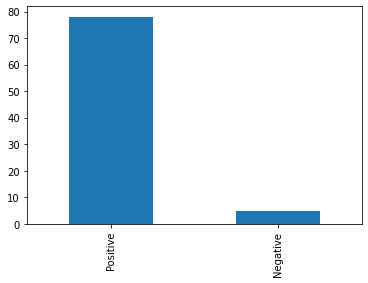

In [68]:
data.Sentiment.value_counts().plot.bar()

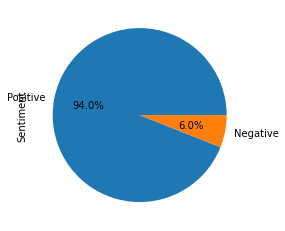

In [64]:
data.Sentiment.value_counts().plot.pie(autopct="%.1f%%");

In [56]:
#instantiate CountVectorizer() 
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import CountVectorizer 
cv=CountVectorizer() 
 
# this steps generates word counts for the words in your docs 
word_count_vector=cv.fit_transform(data.text)

In [57]:
word_count_vector.shape

(83, 573)

In [58]:
feature_names = cv.get_feature_names()  
output=pd.DataFrame.sparse.from_spmatrix(word_count_vector,columns=feature_names)
output

,1905,22jasminbhasin,430,aarey,actorvijay,adivasis,advert,ago,ags,aitcsudip,...,wrist,write,wrong,yatharv,years,yehhainayidilli,yet,young,youu0001f917,yuvati
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(word_count_vector)

TfidfTransformer()

In [60]:
tfidf_transformer.idf_

array([4.73766962, 4.73766962, 4.73766962, 4.73766962, 4.73766962,
       4.73766962, 4.73766962, 4.73766962, 4.73766962, 4.73766962,
       4.73766962, 4.04452244, 4.73766962, 4.73766962, 4.73766962,
       4.73766962, 4.33220451, 4.73766962, 4.73766962, 4.04452244,
       4.73766962, 4.73766962, 3.35137526, 4.73766962, 4.73766962,
       4.73766962, 4.73766962, 4.33220451, 4.33220451, 4.73766962,
       4.73766962, 4.73766962, 4.73766962, 4.33220451, 4.73766962,
       4.04452244, 4.73766962, 4.73766962, 3.35137526, 4.73766962,
       4.73766962, 4.73766962, 4.73766962, 3.63905733, 4.04452244,
       4.33220451, 4.73766962, 4.73766962, 4.73766962, 4.33220451,
       4.73766962, 4.73766962, 4.73766962, 4.73766962, 4.73766962,
       4.73766962, 4.73766962, 4.73766962, 4.73766962, 4.73766962,
       4.04452244, 4.73766962, 3.23359222, 4.73766962, 4.73766962,
       3.48490665, 3.35137526, 4.73766962, 4.73766962, 4.73766962,
       4.73766962, 4.73766962, 2.7227666 , 4.73766962, 4.33220

In [61]:
# print idf values 
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"]) 
 
# sort ascending 
df_idf.sort_values(by=['idf_weights'],ascending=0)

,idf_weights
1905,4.737670
nvsubhash4bjp,4.737670
nupursharmabjp,4.737670
ntradmirers,4.737670
nonsattvik,4.737670
...,...
tie,3.128232
celebrate,2.722767
happy,2.435085
rakshabandhan,1.319943


In [62]:
# tf-idf scores 
tf_idf_vector=tfidf_transformer.transform(word_count_vector)
output=pd.DataFrame.sparse.from_spmatrix(tf_idf_vector,columns=feature_names)
output

,1905,22jasminbhasin,430,aarey,actorvijay,adivasis,advert,ago,ags,aitcsudip,...,wrist,write,wrong,yatharv,years,yehhainayidilli,yet,young,youu0001f917,yuvati
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.305015,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
